In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy.stats import skew
import functools
import operator

%matplotlib inline

In [2]:
predicted_label = 'SalePrice'
train_set = pd.read_csv('data/train.csv', index_col=['Id'])
train_set_sale_price = train_set[predicted_label]
train_set_without_sale_price = train_set.drop(labels=[predicted_label], axis=1)

In [3]:
def missing(set_to_check):
    total_missing = set_to_check.isnull().sum().sort_values(ascending=False)
    total_missing = total_missing[total_missing > 0]
    percent_missing = (set_to_check.isnull().sum() / set_to_check.isnull().count()).sort_values(ascending=False)
    percent_missing = percent_missing[percent_missing > 0]
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percentage of Missing'])
    return missing_data

In [4]:
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
train_set_without_sale_price.PoolQC = train_set_without_sale_price.PoolQC.fillna('No')
train_set_without_sale_price.MiscFeature = train_set_without_sale_price.MiscFeature.fillna('None')
train_set_without_sale_price.Alley = train_set_without_sale_price.Alley.fillna('None')
train_set_without_sale_price.Fence = train_set_without_sale_price.Fence.fillna('No')
train_set_without_sale_price.FireplaceQu = train_set_without_sale_price.FireplaceQu.fillna('No')
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


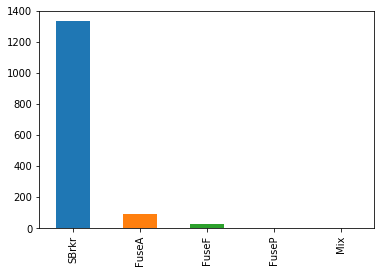

In [6]:
train_set.Electrical.value_counts().plot(kind='bar');

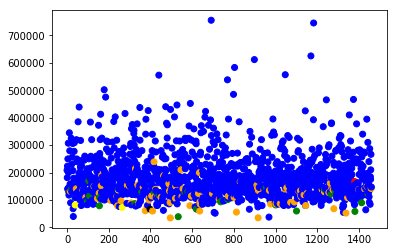

In [7]:
color_map = {'SBrkr': 'Blue', 'FuseA': 'Orange', 'FuseF': 'Green', 'FuseP': 'Yellow', 'Mix': 'Black', 'NA': 'Red'}
colors = [color_map[e] for e in train_set_without_sale_price.Electrical.copy().fillna('NA')]
plt.scatter(x=range(0, train_set_sale_price.shape[0]), y=train_set_sale_price, c=colors)
del color_map, colors

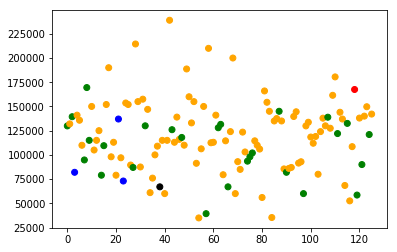

In [8]:
color_map = {'FuseA': 'Orange', 'FuseF': 'Green', 'FuseP': 'Blue', 'Mix': 'Black', 'NA': 'Red'}
colors = [color_map[e] for e in train_set_without_sale_price.Electrical.copy().fillna('NA') if e != 'SBrkr']
plt.scatter(x=range(0, len(colors)), y=train_set_sale_price[train_set_without_sale_price.Electrical != 'SBrkr'], c=colors)
del color_map, colors

In [9]:
train_set_without_sale_price.Electrical = train_set_without_sale_price.Electrical.fillna('SBrkr')
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageQual,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


In [10]:
train_set_without_sale_price[train_set_without_sale_price.GarageYrBlt.isnull()].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,81.000000,74.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.0,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.000000,81.000000,81.000000
mean,71.790123,60.405405,7469.679012,4.604938,5.530864,1942.481481,1975.172840,13.777778,240.382716,20.111111,...,0.0,39.555556,36.172840,37.530864,0.0,0.0,0.0,53.703704,6.111111,2007.876543
std,58.327248,22.686620,3116.165893,1.136651,1.565938,29.664841,21.743844,52.372703,331.144552,93.498797,...,0.0,82.426179,81.820045,68.891234,0.0,0.0,0.0,393.365112,2.828427,1.297909
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,2006.000000
25%,30.000000,50.000000,5586.000000,4.000000,5.000000,1920.000000,1950.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.000000,2007.000000
50%,50.000000,60.000000,7711.000000,5.000000,5.000000,1940.000000,1971.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6.000000,2008.000000
75%,90.000000,69.250000,9098.000000,5.000000,7.000000,1970.000000,1996.000000,0.000000,432.000000,0.000000,...,0.0,32.000000,30.000000,30.000000,0.0,0.0,0.0,0.000000,8.000000,2009.000000
max,190.000000,153.000000,18030.000000,8.000000,9.000000,2007.000000,2008.000000,270.000000,1440.000000,499.000000,...,0.0,352.000000,523.000000,286.000000,0.0,0.0,0.0,3500.000000,12.000000,2010.000000


In [11]:
[train_set_without_sale_price[train_set_without_sale_price.GarageYrBlt.isnull()][column].isnull().sum() for column in ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']] 

[81, 81, 81, 81]

In [12]:
train_set_without_sale_price[train_set_without_sale_price.GarageYrBlt.isnull()].GarageArea.sum()

0

In [13]:
(train_set_without_sale_price[train_set_without_sale_price.GarageArea == 0].index
 ==
 train_set_without_sale_price[train_set_without_sale_price.GarageYrBlt.isnull()].index).sum()

81

In [14]:
(lambda zeroGarageArea_GarageCars: (len(zeroGarageArea_GarageCars), zeroGarageArea_GarageCars.sum()))(train_set_without_sale_price[train_set_without_sale_price.GarageArea == 0].GarageCars)

(81, 0)

In [15]:
for column in ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']:
    train_set_without_sale_price[column] = train_set_without_sale_price[column].fillna('No')
train_set_without_sale_price.GarageYrBlt = train_set_without_sale_price.GarageYrBlt.fillna(0)
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
MasVnrType,8,0.005479
MasVnrArea,8,0.005479


In [16]:
(lambda no_BsmtExposure_BsmtQaul: no_BsmtExposure_BsmtQaul[no_BsmtExposure_BsmtQaul.notnull()])(
    train_set_without_sale_price[train_set_without_sale_price.BsmtExposure.isnull()].BsmtQual
)

Id
949    Gd
Name: BsmtQual, dtype: object

In [17]:
train_set_without_sale_price.loc[949, :]

MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea            14006
Street              Pave
Alley               None
LotShape             IR1
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2002
YearRemodAdd        2002
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           144
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
                  ...   
HalfBath               1
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           7
Functional           Typ
Fireplaces             1
FireplaceQu           TA
GarageType        Attchd


In [18]:
train_set_sale_price[949]

192500

In [19]:
train_set_sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [20]:
train_set_without_sale_price.loc[949, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']]

BsmtExposure    NaN
BsmtFinType2    Unf
BsmtFinType1    Unf
BsmtCond         TA
BsmtQual         Gd
Name: 949, dtype: object

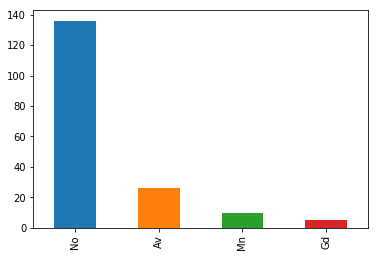

In [21]:
train_set_without_sale_price[
    (train_set_without_sale_price.BsmtFinType2 == 'Unf')
    &
    (train_set_without_sale_price.BsmtFinType1 == 'Unf')
    &
    (train_set_without_sale_price.BsmtCond == 'TA')
    &
    (train_set_without_sale_price.BsmtQual == 'Gd')
].BsmtExposure.value_counts().plot(kind='bar');

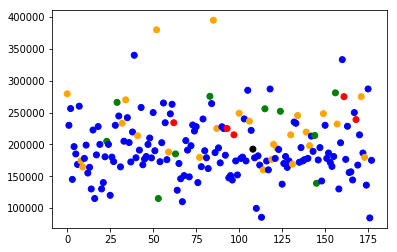

In [22]:
plot_objects = train_set_without_sale_price[
    (train_set_without_sale_price.BsmtFinType2 == 'Unf')
    &
    (train_set_without_sale_price.BsmtFinType1 == 'Unf')
    &
    (train_set_without_sale_price.BsmtCond == 'TA')
    &
    (train_set_without_sale_price.BsmtQual == 'Gd')
].BsmtExposure.fillna('NA')
color_map = {'No': 'Blue', 'Av': 'Orange', 'Mn': 'Green', 'Gd': 'Red', 'NA': 'Black'}
colors = [color_map[point] for point in plot_objects]
plt.scatter(x=range(0, len(colors)), y=train_set_sale_price[plot_objects.index], c=colors)
del plot_objects, color_map, colors

In [23]:
train_set_without_sale_price.at[949, 'BsmtExposure'] = 'No'
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342
BsmtExposure,37,0.025342
BsmtCond,37,0.025342
MasVnrType,8,0.005479
MasVnrArea,8,0.005479


In [24]:
(lambda no_BsmtFinType2_BsmtQaul: no_BsmtFinType2_BsmtQaul[no_BsmtFinType2_BsmtQaul.notnull()])(
    train_set_without_sale_price[train_set_without_sale_price.BsmtFinType2.isnull()].BsmtQual
)

Id
333    Gd
Name: BsmtQual, dtype: object

In [25]:
train_set_without_sale_price.loc[333, :]

MSSubClass            20
MSZoning              RL
LotFrontage           85
LotArea            10655
Street              Pave
Alley               None
LotShape             IR1
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     NridgHt
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            8
OverallCond            5
YearBuilt           2003
YearRemodAdd        2004
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           296
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
                  ...   
HalfBath               0
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           7
Functional           Typ
Fireplaces             1
FireplaceQu           Gd
GarageType        Attchd


In [26]:
train_set_sale_price[333]

284000

In [27]:
train_set_without_sale_price.loc[333, ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']]

BsmtExposure     No
BsmtFinType2    NaN
BsmtFinType1    GLQ
BsmtCond         TA
BsmtQual         Gd
Name: 333, dtype: object

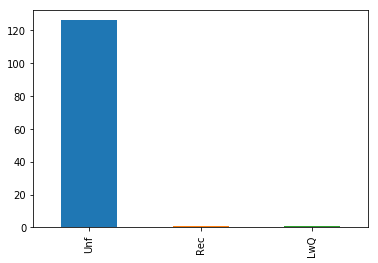

In [28]:
train_set_without_sale_price[
    (train_set_without_sale_price.BsmtExposure == 'No')
    &
    (train_set_without_sale_price.BsmtFinType1 == 'GLQ')
    &
    (train_set_without_sale_price.BsmtCond == 'TA')
    &
    (train_set_without_sale_price.BsmtQual == 'Gd')
].BsmtFinType2.value_counts().plot(kind='bar');

In [29]:
train_set_without_sale_price.at[333, 'BsmtFinType2'] = 'No'
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
BsmtQual,37,0.025342
BsmtFinType2,37,0.025342
BsmtFinType1,37,0.025342
BsmtExposure,37,0.025342
BsmtCond,37,0.025342
MasVnrType,8,0.005479
MasVnrArea,8,0.005479


In [30]:
(
    train_set_without_sale_price.BsmtQual.isnull()
    &
    train_set_without_sale_price.BsmtFinType2.isnull()
    &
    train_set_without_sale_price.BsmtFinType1.isnull()
    &
    train_set_without_sale_price.BsmtExposure.isnull()
    &
    train_set_without_sale_price.BsmtCond.isnull()
).sum()

37

In [31]:
train_set_without_sale_price[train_set_without_sale_price.BsmtQual.isnull()].TotalBsmtSF.describe()

count    37.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: TotalBsmtSF, dtype: float64

In [32]:
for column in ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']:
    train_set_without_sale_price[column] = train_set_without_sale_price[column].fillna('No')
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
MasVnrType,8,0.005479
MasVnrArea,8,0.005479


In [33]:
(train_set_without_sale_price[train_set_without_sale_price.MasVnrType.isnull()].index
 ==
 train_set_without_sale_price[train_set_without_sale_price.MasVnrArea.isnull()].index).sum()

8

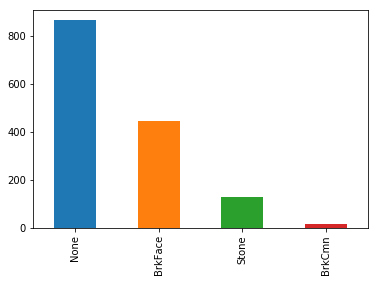

In [34]:
train_set_without_sale_price.MasVnrType.value_counts().plot(kind='bar');

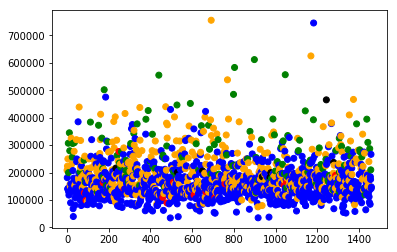

In [35]:
color_map = {'None': 'Blue', 'BrkFace': 'Orange', 'Stone': 'Green', 'BrkCmn': 'Red', 'NA': 'Black'}
colors = [color_map[point] for point in train_set_without_sale_price.MasVnrType.fillna('NA')]
plt.scatter(x=range(0, len(colors)), y=train_set_sale_price, c=colors)
del color_map, colors

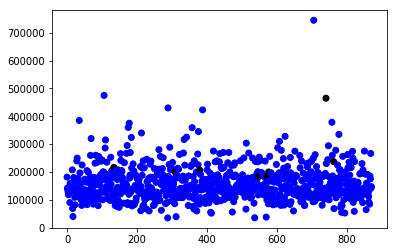

In [36]:
color_map = {'None': 'Blue', 'NA': 'Black'}
indexes = train_set_without_sale_price.MasVnrType[(train_set_without_sale_price.MasVnrType.isnull() | (train_set_without_sale_price.MasVnrType == 'None'))].index
points = train_set_without_sale_price.MasVnrType[indexes].fillna('NA')
colors = [color_map[point] for point in points]
plt.scatter(x=range(0, len(colors)), y=train_set_sale_price[indexes], c=colors)
del color_map, indexes, colors

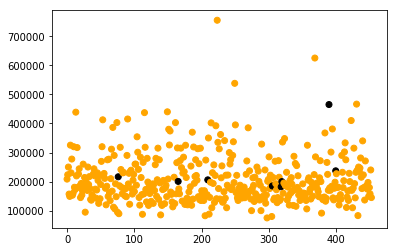

In [37]:
color_map = {'BrkFace': 'Orange', 'NA': 'Black'}
indexes = train_set_without_sale_price.MasVnrType[(train_set_without_sale_price.MasVnrType.isnull() | (train_set_without_sale_price.MasVnrType == 'BrkFace'))].index
points = train_set_without_sale_price.MasVnrType[indexes].fillna('NA')
colors = [color_map[point] for point in points]
plt.scatter(x=range(0, len(colors)), y=train_set_sale_price[indexes], c=colors)
del color_map, indexes, colors

In [38]:
train_set_sale_price[train_set_without_sale_price.MasVnrType.isnull()].describe()

count         8.000000
mean     236484.250000
std       93964.474968
min      182000.000000
25%      196150.000000
50%      203287.000000
75%      221625.000000
max      465000.000000
Name: SalePrice, dtype: float64

In [39]:
train_set_sale_price[train_set_without_sale_price.MasVnrType == 'BrkFace'].describe()

count       445.000000
mean     204691.871910
std       81214.293554
min       75000.000000
25%      149300.000000
50%      181000.000000
75%      236000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [40]:
train_set_sale_price[train_set_without_sale_price.MasVnrType == 'None'].describe()

count       864.000000
mean     156221.891204
std       60708.262798
min       34900.000000
25%      118991.000000
50%      143000.000000
75%      181875.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [41]:
train_set_without_sale_price.MasVnrArea[train_set_without_sale_price.MasVnrType == 'BrkFace'].describe()

count     445.000000
mean      259.008989
std       215.137888
min         0.000000
25%       114.000000
50%       202.000000
75%       336.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

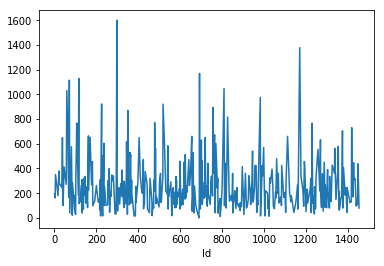

In [42]:
train_set_without_sale_price.MasVnrArea[train_set_without_sale_price.MasVnrType == 'BrkFace'].plot(kind='line');

In [43]:
train_set_without_sale_price.MasVnrArea[train_set_without_sale_price.MasVnrArea.notnull()].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

/home/ivo/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


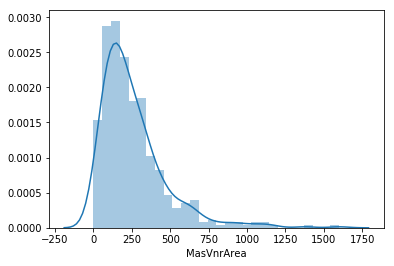

In [44]:
sns.distplot(train_set_without_sale_price.MasVnrArea[train_set_without_sale_price.MasVnrType == 'BrkFace']);

In [45]:
masVnrArea_set = train_set_without_sale_price[
    (train_set_without_sale_price.MasVnrType == 'BrkFace')
    |
    train_set_without_sale_price.MasVnrType.isnull()].drop(labels=['LotFrontage'], axis=1)

masVnrArea_train = masVnrArea_set[masVnrArea_set.MasVnrType == 'BrkFace'].drop(labels=['MasVnrType'], axis=1)
masVnrArea_y = masVnrArea_train.MasVnrArea
masVnrArea_X = masVnrArea_train.drop(labels=['MasVnrArea'], axis=1)
print(masVnrArea_train.shape)

masVnrArea_T = masVnrArea_set[masVnrArea_set.MasVnrType.isnull()].drop(labels=['MasVnrType', 'MasVnrArea'], axis=1)

categorical_columns = masVnrArea_T.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(masVnrArea_set[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(masVnrArea_X[categorical_columns])
one_hot_T = one_hot_encoder.transform(masVnrArea_T[categorical_columns])

numeric_column_names = masVnrArea_T.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), masVnrArea_X[numeric_column_names]], axis=1)
new_T = pd.np.concatenate([one_hot_T.todense(), masVnrArea_T[numeric_column_names]], axis=1)
print(new_x_train.shape)

masVnrArea = LinearRegression().fit(new_x_train, masVnrArea_y)
print()
print(masVnrArea.score(new_x_train, masVnrArea_y))
print(r2_score(masVnrArea.predict(new_x_train), masVnrArea_y))
print(masVnrArea.predict(new_T))

(445, 77)
(445, 244)

0.7239237890131502
0.6186391230999766
[ 80.16265629 389.13991298 415.47095143  42.11930916 304.2387712
 831.28448317 514.54595935 277.13147516]


In [46]:
train_set_without_sale_price.MasVnrArea = train_set_without_sale_price.MasVnrArea.fillna(train_set_without_sale_price[train_set_without_sale_price.MasVnrType == 'BrkFace'].MasVnrArea.mean())
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397
MasVnrType,8,0.005479


In [47]:
train_set_without_sale_price.MasVnrType = train_set_without_sale_price.MasVnrType.fillna('BrkFace')
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397


In [48]:
missing_columns = ['LotFrontage']
train_set_without_sale_price_without_missing = train_set_without_sale_price.drop(labels=missing_columns, axis=1)

x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price_without_missing, train_set_sale_price, test_size=0.3, random_state=4330)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price_without_missing[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
ridge = Ridge(alpha=0.18).fit(new_x_train, pd.np.log10(y_train))

print()
print(r2_score(10**ridge.predict(new_x_train), y_train))
print(r2_score(10**ridge.predict(new_x_test), y_test))

#regr = RandomForestRegressor(max_depth=20, random_state=4330, criterion='mae', n_estimators=50)
#regr.fit(new_x_train, pd.np.log10(y_train))
#print()
#print(r2_score(10**regr.predict(new_x_train), y_train))
#print(r2_score(10**regr.predict(new_x_test), y_test))


0.9408484568304442
0.9205446171566092


In [49]:
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing
LotFrontage,259,0.177397


In [50]:
train_set_without_sale_price.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

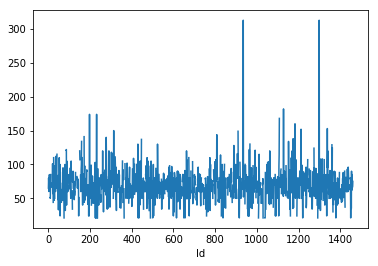

In [51]:
train_set_without_sale_price.LotFrontage.plot(kind='line');

/home/ivo/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


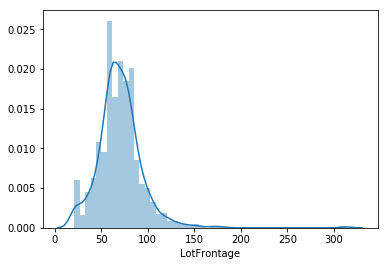

In [52]:
sns.distplot(train_set_without_sale_price.LotFrontage[train_set_without_sale_price.LotFrontage.notnull()]);

In [53]:
train_set[train_set.LotFrontage > 300].SalePrice.describe()

count         2.000000
mean     201000.000000
std       57982.756057
min      160000.000000
25%      180500.000000
50%      201000.000000
75%      221500.000000
max      242000.000000
Name: SalePrice, dtype: float64

In [54]:
train_set_sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

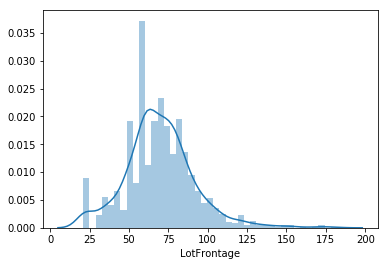

In [55]:
outliers_indexes = train_set[train_set.LotFrontage > 300].index
train_set = train_set.drop(index=outliers_indexes)
train_set_without_sale_price = train_set_without_sale_price.drop(index=outliers_indexes)
train_set_sale_price = train_set_sale_price.drop(index=outliers_indexes)
del outliers_indexes
sns.distplot(train_set_without_sale_price.LotFrontage[train_set_without_sale_price.LotFrontage.notnull()]);

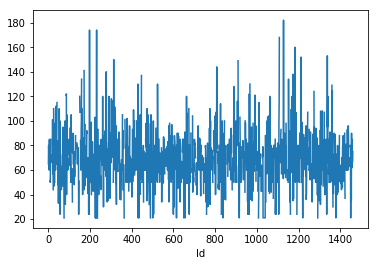

In [56]:
train_set_without_sale_price.LotFrontage.plot(kind='line');

In [57]:
train_set_without_sale_price.LotFrontage.describe()

count    1199.000000
mean       69.644704
std        22.181762
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

In [58]:
train_set[train_set.LotFrontage > 140].SalePrice.describe()

count        11.000000
mean     283702.272727
std      180717.334688
min       52500.000000
25%      194500.000000
50%      235000.000000
75%      324862.500000
max      745000.000000
Name: SalePrice, dtype: float64

In [59]:
train_set_without_sale_price.LotFrontage = train_set_without_sale_price.LotFrontage.fillna(train_set_without_sale_price.LotFrontage.mean())
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing


In [60]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

for a in np.linspace(start=0.0001, stop=0.8, num=20):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))


0.0001
0.9477289240578775
0.915128032693252

0.04220000000000001
0.9474780880888035
0.9171928748109339

0.08430000000000001
0.9471981184220433
0.9185703862901353

0.1264
0.9469119426103053
0.9195977257205967

0.1685
0.9466259779233808
0.9204113371400037

0.2106
0.9463422888077518
0.9210794425535107

0.25270000000000004
0.9460615932412505
0.921641365434596

0.2948
0.9457841521231927
0.9221221437133013

0.33690000000000003
0.945510061193372
0.9225388921430675

0.37900000000000006
0.9452393528164197
0.9229039274977463

0.42110000000000003
0.9449720325746201
0.9232264575015897

0.46320000000000006
0.9447080925548126
0.9235135666146591

0.5053000000000001
0.9444475162013043
0.9237708285261302

0.5474000000000001
0.9441902801831399
0.9240027065843952

0.5895
0.9439363552798018
0.9242128266936113

0.6316
0.9436857069983002
0.9244041697375437

0.6737000000000001
0.9434382961499348
0.9245792111241714

0.7158000000000001
0.9431940794390947
0.9247400243713207

0.7579000000000001
0.94295301005882

In [61]:
#regr = RandomForestRegressor(max_depth=100, random_state=4330, criterion='mae', n_estimators=100)
#regr.fit(new_x_train, pd.np.log10(y_train))
#print()
#print(r2_score(10**regr.predict(new_x_train), y_train))
#print(r2_score(10**regr.predict(new_x_test), y_test))

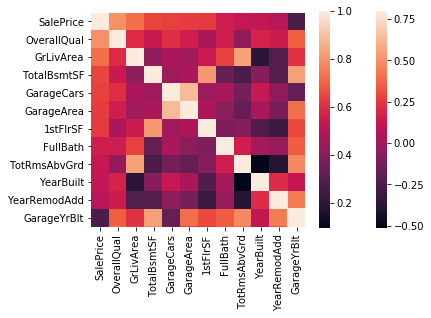

In [62]:
corrmat = train_set.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
cols = corrmat.nlargest(12, predicted_label)[predicted_label].index
cm = np.corrcoef(train_set[cols].values.T)
hm = sns.heatmap(cm, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [63]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt'],
      dtype='object')

In [64]:
cm[0]

array([1.        , 0.79361027, 0.72543777, 0.64675019, 0.64048879,
       0.62852081, 0.62577153, 0.56075671, 0.5361747 , 0.52372239,
       0.50727135,        nan])

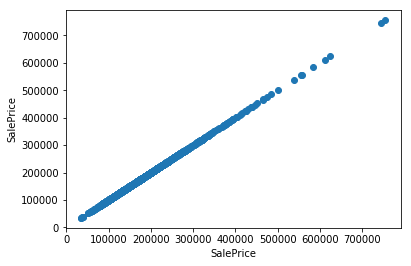

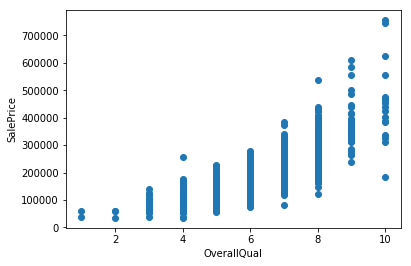

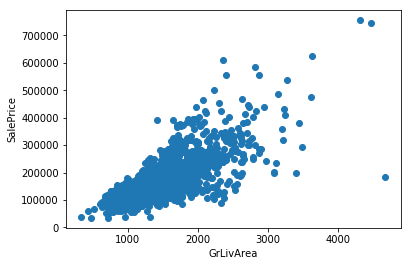

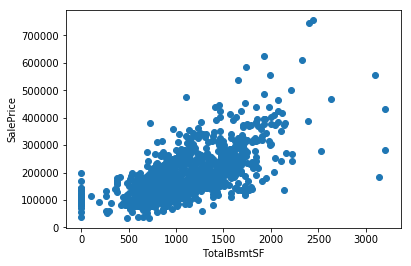

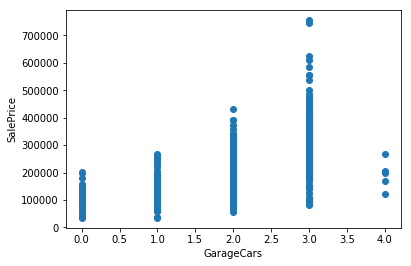

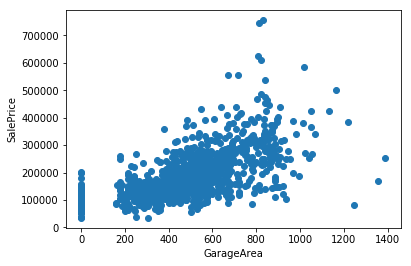

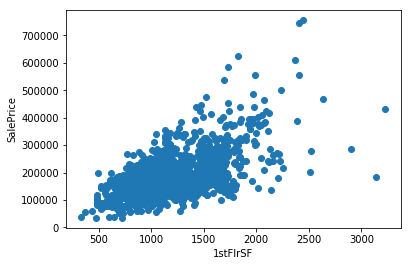

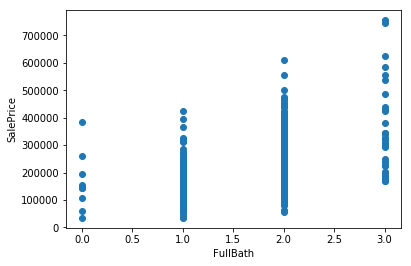

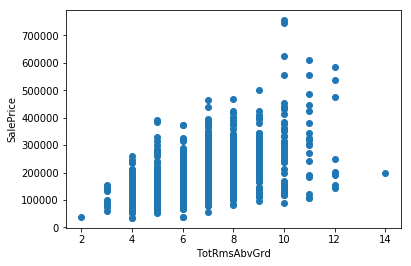

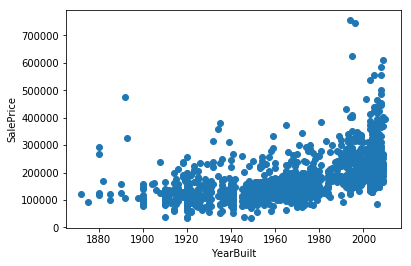

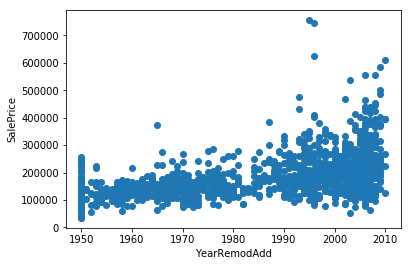

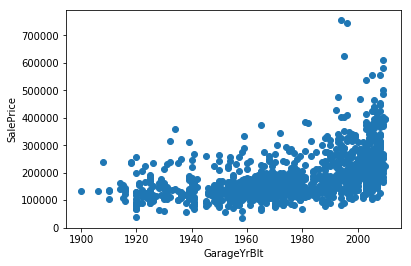

In [65]:
for col in cols:
    plt.scatter(train_set[col], train_set[predicted_label])
    plt.xlabel(col)
    plt.ylabel(predicted_label)
    plt.show()

In [66]:
garage_area_indexes = train_set[(train_set.GrLivArea > 4000) & (train_set[predicted_label] < 300000)].index
train_set = train_set.drop(index=garage_area_indexes)
train_set_without_sale_price = train_set_without_sale_price.drop(index=garage_area_indexes)
train_set_sale_price = train_set_sale_price.drop(index=garage_area_indexes)
del garage_area_indexes

In [67]:
total_bsmt_sf_indexes = train_set[train_set.TotalBsmtSF > 6000].index
train_set = train_set.drop(index=total_bsmt_sf_indexes)
train_set_without_sale_price = train_set_without_sale_price.drop(index=total_bsmt_sf_indexes)
train_set_sale_price = train_set_sale_price.drop(index=total_bsmt_sf_indexes)
del total_bsmt_sf_indexes

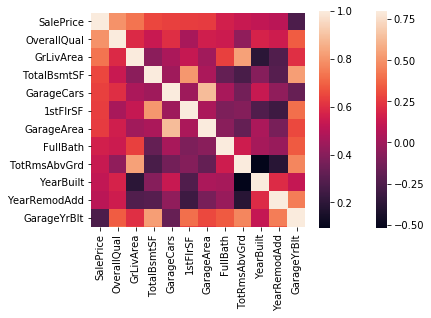

In [68]:
corrmat = train_set.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
cols = corrmat.nlargest(12, predicted_label)[predicted_label].index
cm = np.corrcoef(train_set[cols].values.T)
hm = sns.heatmap(cm, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

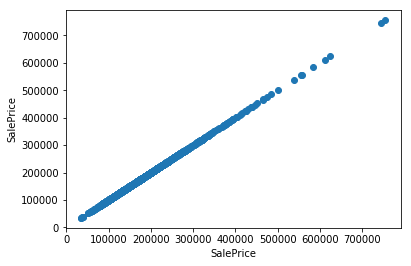

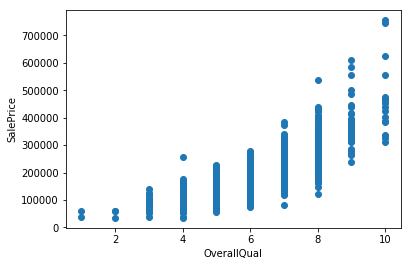

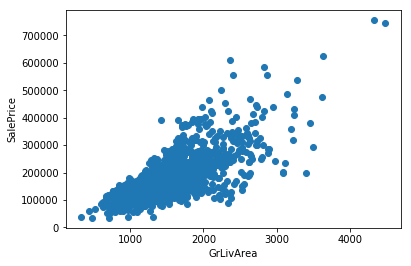

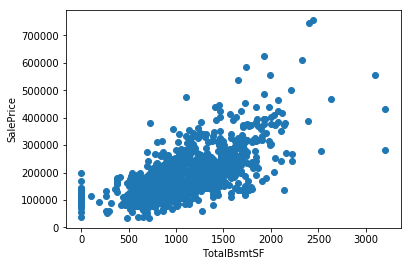

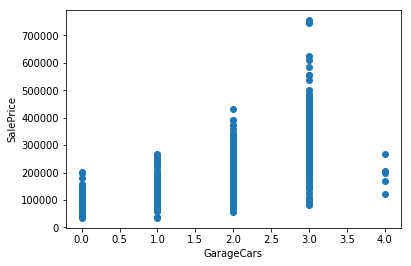

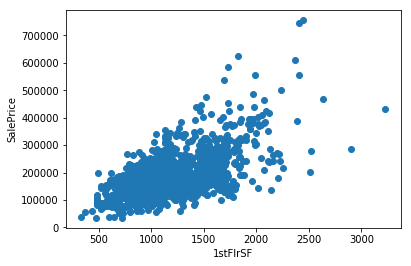

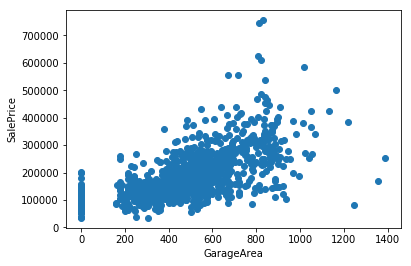

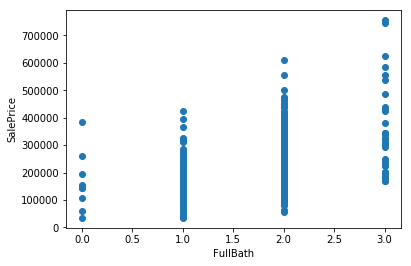

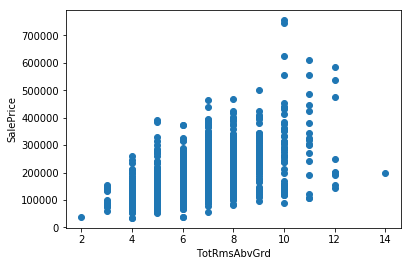

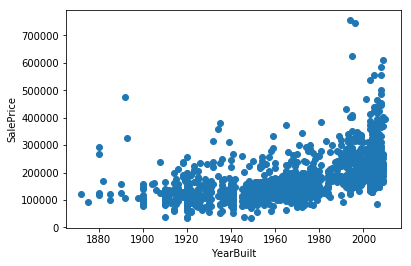

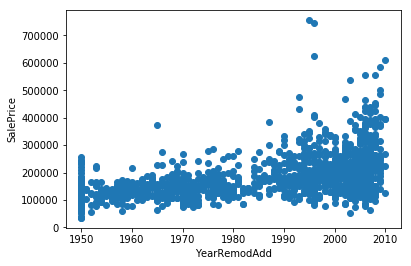

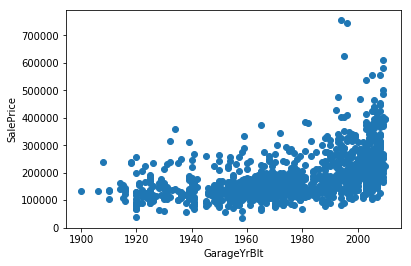

In [69]:
for col in cols:
    plt.scatter(train_set[col], train_set[predicted_label])
    plt.xlabel(col)
    plt.ylabel(predicted_label)
    plt.show()

In [70]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

for a in np.linspace(start=0.0001, stop=0.8, num=20):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))


0.0001
0.9599166065299526
0.9108968634934912

0.04220000000000001
0.9593967630669618
0.92375864326239

0.08430000000000001
0.9592359916830898
0.9248315363779264

0.1264
0.95908628111927
0.925687483496789

0.1685
0.9589467321862344
0.9263874725212979

0.2106
0.9588166744284052
0.9269723805886977

0.25270000000000004
0.9586949674723825
0.9274698878162269

0.2948
0.9585804356330309
0.9278993449084635

0.33690000000000003
0.9584720389915733
0.9282747028392326

0.37900000000000006
0.9583689091914617
0.9286062897746923

0.42110000000000003
0.9582703367628675
0.9289019255231773

0.46320000000000006
0.9581757454124663
0.9291676451735102

0.5053000000000001
0.9580846660635681
0.92940818390702

0.5474000000000001
0.957996714565595
0.9296273108101301

0.5895
0.9579115737201443
0.9298280642498944

0.6316
0.9578289791806343
0.930012921321414

0.6737000000000001
0.9577487085168689
0.9301839220782042

0.7158000000000001
0.9576705727615211
0.9303427620931787

0.7579000000000001
0.9575944098665335
0.9

In [71]:
for a in np.linspace(start=0.05, stop=0.1, num=20):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))


0.05
0.959365810846536
0.9239773806527461

0.052631578947368425
0.9593555372992996
0.924048952260512

0.05526315789473685
0.9593453312536935
0.9241194413941377

0.05789473684210526
0.9593351856357943
0.9241888708174625

0.060526315789473685
0.9593250950476309
0.9242572625766995

0.06315789473684211
0.959315055376582
0.9243246381836747

0.06578947368421054
0.9593050635002631
0.9243910187145273

0.06842105263157895
0.9592951170616008
0.9244564248587637

0.07105263157894737
0.9592852142960709
0.9245208769397181

0.0736842105263158
0.9592753538981312
0.9245843949192201

0.07631578947368421
0.9592655349173591
0.924646998394137

0.07894736842105263
0.9592557566772966
0.9247087065893815

0.08157894736842106
0.9592460187117935
0.9247695383500754

0.08421052631578949
0.9592363207149117
0.9248295121343332

0.08684210526315789
0.9592266625014222
0.9248886460074773

0.08947368421052632
0.959217043975605
0.9249469576380054

0.09210526315789475
0.959207465106596
0.9250044642953813

0.09473684210526

In [72]:
ridge = Ridge(alpha=0.073).fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**ridge.predict(new_x_train), y_train))
print(r2_score(10**ridge.predict(new_x_test), y_test))


0.9592779135842523
0.9245679690052078


In [73]:
old_train_set_without_sale_price = train_set_without_sale_price.copy()

In [74]:
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing


In [75]:
train_set_without_sale_price.MSSubClass = train_set_without_sale_price.MSSubClass.replace({20 : "1-St-1946-NAS", 30 : "1-St-1945-O", 40 : "1-St-WF-ATTIC-ALL-AGES",
                                            45 : "1-1/2-St-UNF-ALL-AGES", 50: "1-1/2-St-FALL-AGES",
                                            60 : "2-St-1946-N", 70 : "2-St-1944-O", 75 : "2-1/2-St-ALL-AGES", 
                                            80 : "Sp-OR-MULTI-L", 85 : "Sp-FOYER", 90 : "DUP-ALL-ST-AGES",
                                            120 : "1-St-PUD-1946-N", 150: "1-1/2 St-PUD-ALL-AGES",
                                            160 : "2-St-PUD-1946-N", 180 : "PUD-MUL-L-INCL-SPLIT-LEV/FOYER",
                                            190 : "2-FAMILY-CONV-ALL-St-AGES"})

In [76]:
train_set_without_sale_price.Street = train_set_without_sale_price.Street.replace({"Grvl" : 1, "Pave" : 2})

In [77]:
train_set_without_sale_price.Alley = train_set_without_sale_price.Alley.replace({"None": 0, "Grvl" : 1, "Pave" : 2})

In [78]:
train_set_without_sale_price.LotShape = train_set_without_sale_price.LotShape.replace({"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4})

In [79]:
train_set_without_sale_price.Utilities = train_set_without_sale_price.Utilities.replace({"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4})

In [80]:
train_set_without_sale_price.ExterQual = train_set_without_sale_price.ExterQual.replace({"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5})

In [81]:
train_set_without_sale_price.ExterCond = train_set_without_sale_price.ExterCond.replace({"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5})

In [82]:
train_set_without_sale_price.BsmtQual = train_set_without_sale_price.BsmtQual.replace({"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5})

In [83]:
train_set_without_sale_price.BsmtCond = train_set_without_sale_price.BsmtCond.replace({"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5})

In [84]:
train_set_without_sale_price.BsmtExposure = train_set_without_sale_price.BsmtExposure.replace({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3})

In [85]:
train_set_without_sale_price.BsmtFinType1 = train_set_without_sale_price.BsmtFinType1.replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6})

In [86]:
train_set_without_sale_price.BsmtFinType2 = train_set_without_sale_price.BsmtFinType2.replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6})

In [87]:
train_set_without_sale_price.HeatingQC = train_set_without_sale_price.HeatingQC.replace({"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

In [88]:
train_set_without_sale_price.KitchenQual = train_set_without_sale_price.KitchenQual.replace({"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

In [89]:
train_set_without_sale_price.Functional= train_set_without_sale_price.Functional.replace({"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8})

In [90]:
train_set_without_sale_price.FireplaceQu = train_set_without_sale_price.FireplaceQu.replace({"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

In [91]:
train_set_without_sale_price.GarageFinish = train_set_without_sale_price.GarageFinish.replace({"No": 0, "Unf": 1, "RFn": 2, "Fin": 3})

In [92]:
train_set_without_sale_price.GarageQual = train_set_without_sale_price.GarageQual.replace({"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

In [93]:
train_set_without_sale_price.GarageCond = train_set_without_sale_price.GarageCond.replace({"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

In [94]:
train_set_without_sale_price.PavedDrive = train_set_without_sale_price.PavedDrive.replace({"N" : 0, "P" : 1, "Y" : 2})

In [95]:
train_set_without_sale_price.PoolQC = train_set_without_sale_price.PoolQC.replace({"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})

In [96]:
train_set_without_sale_price.MoSold = train_set_without_sale_price.MoSold.replace({1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"})

In [97]:
missing(train_set_without_sale_price)

,Total Missing,Percentage of Missing


In [98]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

for a in np.linspace(start=0.0001, stop=0.9, num=20):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))


0.0001
0.9559053231895566
0.913719296366518

0.047463157894736846
0.9559672347552542
0.9161770684458749

0.09482631578947369
0.9559961880264628
0.9177996752468369

0.14218947368421053
0.95599134327445
0.9190028700463032

0.18955263157894736
0.9559635490407064
0.9199421396320893

0.2369157894736842
0.9559205653101477
0.920701921973725

0.2842789473684211
0.9558674957321871
0.9213333579652008

0.3316421052631579
0.9558077126248464
0.9218695021444756

0.37900526315789473
0.9557434848942836
0.9223327470038396

0.42636842105263156
0.9556763682800823
0.9227388301636499

0.4737315789473684
0.9556074477501697
0.923099149289283

0.5210947368421053
0.9555374907902731
0.9234221697544885

0.5684578947368422
0.955467046492369
0.9237143164036108

0.6158210526315789
0.9553965110172329
0.9239805579586996

0.6631842105263158
0.9553261717325896
0.9242248011640888

0.7105473684210526
0.9552562375334351
0.9244501632824902

0.7579105263157895
0.9551868600253997
0.9246591646196339

0.8052736842105264
0.955

In [99]:
reg = LinearRegression().fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**reg.predict(new_x_train), y_train))
print(r2_score(10**reg.predict(new_x_test), y_test))


0.9559052143353365
0.9137121693975079


In [100]:
train_set_without_sale_price["SimplOverallQual"] = train_set_without_sale_price.OverallQual.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
train_set_without_sale_price["SimplOverallCond"] = train_set_without_sale_price.OverallCond.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
train_set_without_sale_price["SimplPoolQC"] = train_set_without_sale_price.PoolQC.replace({0: 0, 1 : 1, 2 : 1, 3 : 2, 4 : 2})
train_set_without_sale_price["SimplGarageCond"] = train_set_without_sale_price.GarageCond.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplGarageQual"] = train_set_without_sale_price.GarageQual.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplFireplaceQu"] = train_set_without_sale_price.FireplaceQu.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplFireplaceQu"] = train_set_without_sale_price.FireplaceQu.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplFunctional"] = train_set_without_sale_price.Functional.replace({0: 0, 1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
train_set_without_sale_price["SimplKitchenQual"] = train_set_without_sale_price.KitchenQual.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplHeatingQC"] = train_set_without_sale_price.HeatingQC.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplBsmtFinType1"] = train_set_without_sale_price.BsmtFinType1.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
train_set_without_sale_price["SimplBsmtFinType2"] = train_set_without_sale_price.BsmtFinType2.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
train_set_without_sale_price["SimplBsmtCond"] = train_set_without_sale_price.BsmtCond.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplBsmtQual"] = train_set_without_sale_price.BsmtQual.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplExterCond"] = train_set_without_sale_price.ExterCond.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
train_set_without_sale_price["SimplExterQual"] = train_set_without_sale_price.ExterQual.replace({0: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

In [101]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

for a in np.linspace(start=0.09, stop=0.9, num=20):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))


0.09
0.9564214597240813
0.9203253184835767

0.13263157894736843
0.9564162870775685
0.9215940496068957

0.17526315789473684
0.9563945417416859
0.9225623117353112

0.21789473684210528
0.9563602409328411
0.9233384251511904

0.2605263157894737
0.9563169795608095
0.9239805281320264

0.30315789473684207
0.9562674204329334
0.9245242548259986

0.34578947368421054
0.9562134727093382
0.9249931141829701

0.388421052631579
0.9561565036171217
0.9254033975266903

0.43105263157894735
0.9560974994502867
0.9257668141563167

0.4736842105263158
0.956037178304276
0.9260920264058422

0.5163157894736842
0.9559760676788702
0.9263855964914532

0.5589473684210526
0.9559145580414515
0.926652596533206

0.6015789473684211
0.9558529401558175
0.9268970154569596

0.6442105263157895
0.9557914314117714
0.9271220383030985

0.6868421052631579
0.9557301946311065
0.9273302426641286

0.7294736842105263
0.9556693516657826
0.9275237397664677

0.7721052631578947
0.9556089933457345
0.9277042776753596

0.8147368421052632
0.955

In [102]:
reg = LinearRegression().fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**reg.predict(new_x_train), y_train))
print(r2_score(10**reg.predict(new_x_test), y_test))


0.9579464605308172
0.6403588147032513


In [103]:
train_set_without_sale_price["OverallGrade"] = train_set_without_sale_price.OverallQual * train_set_without_sale_price.OverallCond
train_set_without_sale_price["GarageGrade"] = train_set_without_sale_price.GarageQual * train_set_without_sale_price.GarageCond
train_set_without_sale_price["ExterGrade"] = train_set_without_sale_price.ExterQual * train_set_without_sale_price.ExterCond
train_set_without_sale_price["KitchenScore"] = train_set_without_sale_price.KitchenAbvGr * train_set_without_sale_price.KitchenQual
train_set_without_sale_price["FireplaceScore"] = train_set_without_sale_price.Fireplaces * train_set_without_sale_price.FireplaceQu
train_set_without_sale_price["GarageScore"] = train_set_without_sale_price.GarageArea * train_set_without_sale_price.GarageQual
train_set_without_sale_price["PoolScore"] = train_set_without_sale_price.PoolArea * train_set_without_sale_price.PoolQC
train_set_without_sale_price["SimplOverallGrade"] = train_set_without_sale_price.SimplOverallQual * train_set_without_sale_price.SimplOverallCond
train_set_without_sale_price["SimplExterGrade"] = train_set_without_sale_price.SimplExterQual * train_set_without_sale_price.SimplExterCond
train_set_without_sale_price["SimplPoolScore"] = train_set_without_sale_price.PoolArea * train_set_without_sale_price.SimplPoolQC
train_set_without_sale_price["SimplGarageScore"] = train_set_without_sale_price.GarageArea * train_set_without_sale_price.SimplGarageQual
train_set_without_sale_price["SimplFireplaceScore"] = train_set_without_sale_price.Fireplaces * train_set_without_sale_price.SimplFireplaceQu
train_set_without_sale_price["SimplKitchenScore"] = train_set_without_sale_price.KitchenAbvGr * train_set_without_sale_price.SimplKitchenQual
train_set_without_sale_price["TotalBath"] = train_set_without_sale_price.BsmtFullBath + (0.5 * train_set_without_sale_price.BsmtHalfBath) + train_set_without_sale_price.FullBath + (0.5 * train_set_without_sale_price.HalfBath)
train_set_without_sale_price["AllSF"] = train_set_without_sale_price.GrLivArea + train_set_without_sale_price.TotalBsmtSF
train_set_without_sale_price["AllFlrsSF"] = train_set_without_sale_price["1stFlrSF"] + train_set_without_sale_price["2ndFlrSF"]
train_set_without_sale_price["AllPorchSF"] = train_set_without_sale_price.OpenPorchSF + train_set_without_sale_price.EnclosedPorch + train_set_without_sale_price["3SsnPorch"] + train_set_without_sale_price.ScreenPorch
train_set_without_sale_price["HasMasVnr"] = train_set_without_sale_price.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
train_set_without_sale_price["BoughtOffPlan"] = train_set_without_sale_price.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

In [104]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

for a in np.linspace(start=0.09, stop=0.9, num=20):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))


0.09
0.9580570697047844
0.9210419083485074

0.13263157894736843
0.9579012279984098
0.9230290519707453

0.17526315789473684
0.9577768902410586
0.9242893275760344

0.21789473684210528
0.9576684472246009
0.9251840422521851

0.2605263157894737
0.9575693207133593
0.9258678546750392

0.30315789473684207
0.9574763323334008
0.9264176796096917

0.34578947368421054
0.9573877801230686
0.9268760927242831

0.388421052631579
0.9573026739977644
0.9272686487085228

0.43105263157894735
0.9572203959866825
0.9276116901149952

0.4736842105263158
0.9571405357709531
0.9279162143129289

0.5163157894736842
0.9570628054785433
0.9281899367753526

0.5589473684210526
0.9569869930049526
0.9284384612821771

0.6015789473684211
0.9569129352024138
0.9286659782843403

0.6442105263157895
0.9568405018357502
0.9288757000550621

0.6868421052631579
0.956769585624848
0.9290701420521815

0.7294736842105263
0.9567000958571812
0.9292513107673158

0.7721052631578947
0.9566319541637986
0.929420832702743

0.8147368421052632
0.956

In [105]:
reg = LinearRegression().fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**reg.predict(new_x_train), y_train))
print(r2_score(10**reg.predict(new_x_test), y_test))


0.9588066835511271
0.9040205205600138


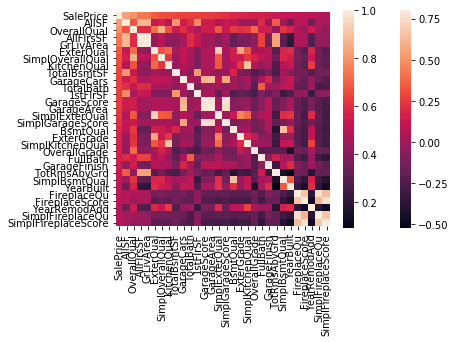

In [106]:
train_set_without_sale_price[predicted_label] = train_set_sale_price
corrmat = train_set_without_sale_price.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
cols = corrmat.nlargest(30, predicted_label)[predicted_label].index
cm = np.corrcoef(train_set_without_sale_price[cols].values.T)
hm = sns.heatmap(cm, square=True, yticklabels=cols.values, xticklabels=cols.values)
train_set_without_sale_price.drop(labels=[predicted_label], axis=1)
plt.show()

In [107]:
cm[0]

array([1.        , 0.82915208, 0.79570662, 0.74394323, 0.73484207,
       0.68737066, 0.66339423, 0.66210442, 0.65216378, 0.64103333,
       0.63571458, 0.63166697, 0.63006642, 0.62926828, 0.61689822,
       0.60793528, 0.58655283, 0.57903922, 0.57140774, 0.56653258,
       0.56198154, 0.55021639, 0.5375031 , 0.53405434, 0.52393544,
       0.52087356, 0.51385081, 0.50745387, 0.49509564, 0.49264769])

In [108]:
cols

Index(['SalePrice', 'AllSF', 'OverallQual', 'AllFlrsSF', 'GrLivArea',
       'ExterQual', 'SimplOverallQual', 'KitchenQual', 'TotalBsmtSF',
       'GarageCars', 'TotalBath', '1stFlrSF', 'GarageScore', 'GarageArea',
       'SimplExterQual', 'SimplGarageScore', 'BsmtQual', 'ExterGrade',
       'SimplKitchenQual', 'OverallGrade', 'FullBath', 'GarageFinish',
       'TotRmsAbvGrd', 'SimplBsmtQual', 'YearBuilt', 'FireplaceQu',
       'FireplaceScore', 'YearRemodAdd', 'SimplFireplaceQu',
       'SimplFireplaceScore'],
      dtype='object')

In [109]:
train_set_without_sale_price.shape

(1457, 114)

In [110]:
for feature in cols[1:26]:
    train_set_without_sale_price[feature + '-d2'] = train_set_without_sale_price[feature] ** 2
    train_set_without_sale_price[feature + '-d3'] = train_set_without_sale_price[feature] ** 3

In [111]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

for a in [0.1, 0.2, 0.3, 0.5, 0.7, 1, 10, 100, 1000, 10000]:
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    print()
    print(a)
    print(r2_score(10**ridge.predict(new_x_train), y_train))
    print(r2_score(10**ridge.predict(new_x_test), y_test))

/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.536398e-26
  overwrite_a=True).T
/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.106843e-25
  overwrite_a=True).T
/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.659705e-25
  overwrite_a=True).T
/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.764612e-25
  overwrite_a=True).T
/home/ivo/ML/lib


0.1
0.9822846774534935
0.9521430282135515

0.2
0.9820416308369189
0.9533252006691231

0.3
0.9818375825754645
0.9542676051822572

0.5
0.9814921172520491
0.9556916044330795

0.7
0.9812009031079578
0.9567389327512913

1
0.9808324024815943
0.9578942270330845

10
0.9771498196708582
0.963634608511348

100
0.9709464272927225
0.9648319117301557

1000
0.9652450607133318
0.9623131027070786

10000
0.9630393851636635
0.9573076836911147


/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.424123e-23
  overwrite_a=True).T
/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.320162e-22
  overwrite_a=True).T
/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.208673e-21
  overwrite_a=True).T


In [112]:
ridge = Ridge(alpha=40).fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**ridge.predict(new_x_train), y_train))
print(r2_score(10**ridge.predict(new_x_test), y_test))


0.9736868298991647
0.9649512656507758


/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.182240e-23
  overwrite_a=True).T


In [113]:
train_set_without_sale_price.shape

(1457, 164)

In [114]:
for features in [['OverallQual', 'ExterQual'],
                ['OverallQual', 'KitchenQual'],
                ['OverallQual', 'BsmtQual'],
                ['OverallQual', 'ExterGrade'],
                ['OverallQual', 'OverallGrade'],
                ['OverallQual', 'GarageFinish'],
                ['OverallQual', 'FireplaceQu'],
                ['OverallQual', 'ExterQual', 'KitchenQual'],
                ['OverallQual', 'ExterQual', 'BsmtQual'],
                ['OverallQual', 'ExterQual', 'OverallGrade'],
                ['OverallQual', 'ExterQual', 'GarageFinish'],
                ['OverallQual', 'ExterQual', 'FireplaceQu'],
                ['OverallQual', 'ExterQual', 'KitchenQual', 'BsmtQual'],
                ['OverallQual', 'ExterQual', 'BsmtQual', 'OverallGrade'],
                ['OverallQual', 'ExterQual', 'OverallGrade', 'GarageFinish'],
                ['OverallQual', 'ExterQual', 'GarageFinish'],
                ['OverallQual', 'ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu'],
                ['ExterGrade', 'OverallGrade'],
                ['FireplaceQu', 'FireplaceScore'],
                ['GarageCars', 'GarageScore', 'GarageFinish']]:
    train_set_without_sale_price['-'.join(features)] = functools.reduce(operator.mul, list(map((lambda f: train_set_without_sale_price[f]), features)), 1)                 

In [115]:
train_set_without_sale_price.shape

(1457, 183)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(train_set_without_sale_price, train_set_sale_price, test_size=0.3, random_state=42)

categorical_columns = x_train.select_dtypes(include = ["object"]).columns
one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

numeric_column_names = x_train.select_dtypes(exclude = ["object"]).columns
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

ridge = Ridge(alpha=9).fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**ridge.predict(new_x_train), y_train))
print(r2_score(10**ridge.predict(new_x_test), y_test))


0.978376893134377
0.9623998162335564


/home/ivo/ML/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.940952e-24
  overwrite_a=True).T


In [117]:
categorical_columns = x_train.select_dtypes(include = ["object"]).columns
numeric_columns = train_set_without_sale_price.select_dtypes(exclude = ["object"]).columns
train_numeric = train_set_without_sale_price[numeric_columns]
skewness = train_numeric.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_columns = skewness.index
train_numeric[skewed_columns] = np.log1p(train_numeric[skewed_columns])
x_train, x_test, y_train, y_test = train_test_split(pd.concat([train_numeric, train_set_without_sale_price[categorical_columns]], axis = 1), train_set_sale_price, test_size=0.3, random_state=42)

one_hot_encoder = OneHotEncoder().fit(train_set_without_sale_price[categorical_columns])
one_hot_x_train = one_hot_encoder.transform(x_train[categorical_columns])
one_hot_x_test = one_hot_encoder.transform(x_test[categorical_columns])

stdScaler = StandardScaler()
x_train.loc[:, numeric_columns] = stdScaler.fit_transform(x_train.loc[:, numeric_columns])
x_test.loc[:, numeric_columns] = stdScaler.transform(x_test.loc[:, numeric_columns])
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

129 skewed numerical features to log transform


/home/ivo/ML/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/ivo/ML/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ivo/ML/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ivo/ML/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [118]:
ridge = Ridge(alpha=9).fit(new_x_train, pd.np.log10(y_train))
print()
print(r2_score(10**ridge.predict(new_x_train), y_train))
print(r2_score(10**ridge.predict(new_x_test), y_test))


0.9991210449407235
0.9989422027274326


In [119]:
print(new_x_train.shape)

max_score = 0

for a in np.linspace(0.1, 100, 1000):
    ridge = Ridge(alpha=a).fit(new_x_train, pd.np.log10(y_train))
    score = r2_score(10**ridge.predict(new_x_test), y_test)
    if(score > max_score):
        max_score = score
        print()
        print(a)
        print(r2_score(10**ridge.predict(new_x_train), y_train))
        print(score)

(1019, 356)

0.1
0.9999997934831484
0.9999996135167919
